In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1367, 1025, 3)

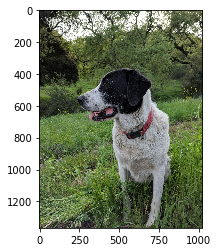

In [7]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)
full.shape

(375, 486, 3)

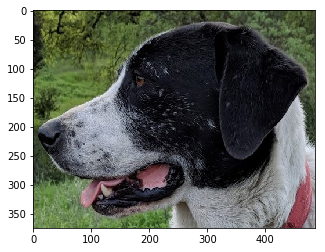

In [8]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)
face.shape

In [9]:
height,width,channel = face.shape

In [10]:
height

375

In [11]:
width

486

In [12]:
channel

3

In [13]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

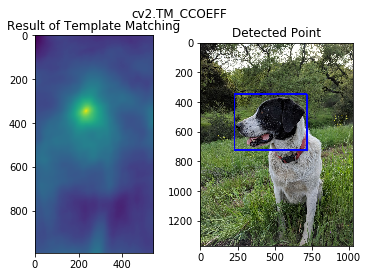

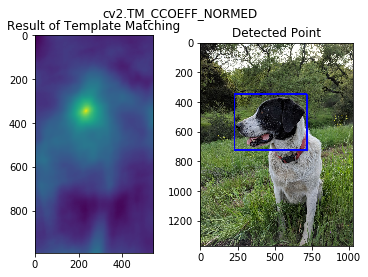

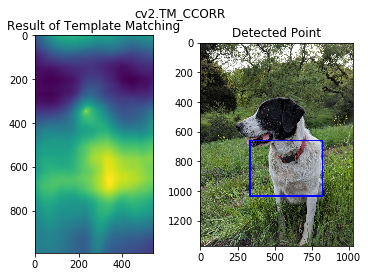

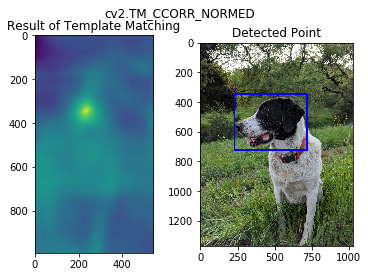

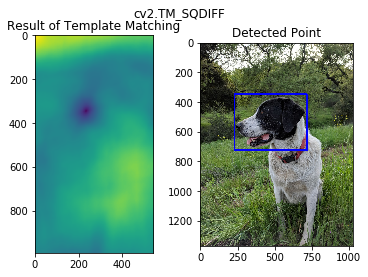

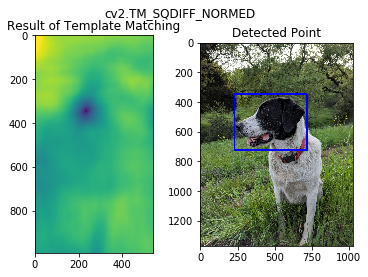

In [17]:
for m in methods :
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width,top_left[1] + height)
    cv2.rectangle(full_copy,top_left,bottom_right,(0,0,255),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')